In [1]:
# import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
# for offline plotly
#from plotly import tools
#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
# for online plotly
import plotly
plotly.tools.set_credentials_file(username='luceven', api_key='###YOUR_API_KEY###')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
import seaborn as sns
# default figure size
#sns.set()
#sns.set(rc={"figure.figsize": (12, 6)})
# default style
sns.set_style('whitegrid')
import datetime as dt
%matplotlib inline

In [2]:
# read in raw data
raw_data = pd.read_csv("./data/crypto-markets.csv")

In [3]:
raw_data.head(20)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32
5,bitcoin,BTC,Bitcoin,2013-05-03,1,106.25,108.13,79.10,97.75,0.0,1.180070e+09,0.6424,29.03
6,bitcoin,BTC,Bitcoin,2013-05-04,1,98.10,115.00,92.50,112.50,0.0,1.089890e+09,0.8889,22.50
7,bitcoin,BTC,Bitcoin,2013-05-05,1,112.90,118.80,107.14,115.91,0.0,1.254760e+09,0.7521,11.66
8,bitcoin,BTC,Bitcoin,2013-05-06,1,115.98,124.66,106.64,112.30,0.0,1.289470e+09,0.3141,18.02
9,bitcoin,BTC,Bitcoin,2013-05-07,1,112.25,113.44,97.70,111.50,0.0,1.248470e+09,0.8767,15.74


In [4]:
# since slug, symbol, and name represent the same thing, we drop slug and symbol
mydata = raw_data.drop(['slug', 'symbol'], axis = 1)

# change date from string to datetime
mydata['date'] = pd.to_datetime(mydata['date'], format='%Y-%m-%d')

In [5]:
mydata.head(20)

,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
1,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
3,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
4,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32
5,Bitcoin,2013-05-03,1,106.25,108.13,79.10,97.75,0.0,1.180070e+09,0.6424,29.03
6,Bitcoin,2013-05-04,1,98.10,115.00,92.50,112.50,0.0,1.089890e+09,0.8889,22.50
7,Bitcoin,2013-05-05,1,112.90,118.80,107.14,115.91,0.0,1.254760e+09,0.7521,11.66
8,Bitcoin,2013-05-06,1,115.98,124.66,106.64,112.30,0.0,1.289470e+09,0.3141,18.02
9,Bitcoin,2013-05-07,1,112.25,113.44,97.70,111.50,0.0,1.248470e+09,0.8767,15.74


In [6]:
# take out the first three ranked data
btc_data = mydata[mydata['ranknow'] == 1]
other_t10_sum = mydata[(mydata['ranknow'] >= 2) & (mydata['ranknow'] <= 10)].groupby('date', as_index=False).sum()

In [7]:
# plot ohlc of Bitcoin VS sum of all other top 10 cryptocurrency
# ref: https://plot.ly/python/ohlc-charts/
def plot_ohlc(data1, data2):
    trace0 = go.Ohlc(x = data1.date,
                    open = data1.open,
                    high = data1.high,
                    low = data1.low,
                    close = data1.close,
                    name = 'Bitcoin')
    trace1 = go.Ohlc(x = data2.date,
                    open = data2.open,
                    high = data2.high,
                    low = data2.low,
                    close = data2.close,
                    name = 'Other Top 10',
                    increasing=dict(line=dict(color= '#17BECF')),
                    decreasing=dict(line=dict(color= '#7F7F7F')))
    data = [trace0, trace1]
    py.iplot(data, filename = 'OHLC for Bitcoin VS ALL Other')
    
plot_ohlc(btc_data, other_t10_sum)

In [8]:
# we can tell that nearly all the dramatic changes start at 2017.
recent_data = mydata[mydata['date'] >= dt.date(2017, 1, 1)]

# take average of high low and close
recent_data['hlc_average'] = (recent_data['high'] + recent_data['low'] + recent_data['close']) / 3

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [9]:
# Bitcoin VS others
btc_mean = recent_data[recent_data['ranknow'] == 1]
other_t10_mean = recent_data[(recent_data['ranknow'] >= 2) & (recent_data['ranknow'] <= 10)].groupby('date', as_index=False).mean()
minor_mean = recent_data[recent_data['ranknow'] > 10].groupby('date', as_index=False).mean()

# plot price and volume
def plot_price_vol_compare(data1, data2, data3):
    fig = tools.make_subplots(rows=1, cols=2, subplot_titles=(
        'Crypto Currency Price', 'Transaction Volume'
    ))

    trace0 = go.Scatter(x=data1['date'], y=data1['hlc_average'], name='Bitcoin')
    fig.append_trace(trace0, 1, 1)

    trace1 = go.Scatter(x=data1['date'], y=data1['volume'], name='Bitcoin')
    fig.append_trace(trace1, 1, 2)

    trace2 = go.Scatter(x=data2['date'], y=data2['hlc_average'], name='Others')
    fig.append_trace(trace2, 1, 1)

    trace3 = go.Scatter(x=data2['date'], y=data2['volume'], name='Others')
    fig.append_trace(trace3, 1, 2)

    trace4 = go.Scatter(x=data3['date'], y=data3['hlc_average'], name='Minor ones')
    fig.append_trace(trace4, 1, 1)

    trace5 = go.Scatter(x=data3['date'], y=data3['volume'], name='Minor ones')
    fig.append_trace(trace5, 1, 2)

    fig['layout'].update(title='BitCoin vs others')
    fig['layout'].update(showlegend=False)
    fig['layout']['yaxis1'].update(title='USD')
    fig['layout']['yaxis2'].update(title='Transactions')
    fig['layout']['xaxis1'].update(nticks=6)
    fig['layout']['xaxis2'].update(nticks=6)

    py.iplot(fig, filename='bitcoin-vs-others')
    
plot_price_vol_compare(btc_mean, other_t10_mean, minor_mean)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [10]:
# Look at Bitcoin specificly
currency = recent_data[recent_data['name'] == 'Bitcoin'].copy()

def plot_candlestick(data):
    increasing_color = '#17BECF'
    decreasing_color = '#7F7F7F'

    plot_data = []

    layout = {
        'xaxis': {
            'rangeselector': {
                'visible': True
            }
        },
        # Adding a volume bar chart for candlesticks is a good practice usually
        'yaxis': {
            'domain': [0, 0.2],
            'showticklabels': False
        },
        'yaxis2': {
            'domain': [0.2, 0.8]
        },
        'legend': {
            'orientation': 'h',
            'y': 0.9,
            'yanchor': 'bottom'
        },
        'margin': {
            't': 40,
            'b': 40,
            'r': 40,
            'l': 40
        }
    }

    # Defining main chart
    trace0 = go.Candlestick(
        x=data['date'], open=data['open'], high=data['high'],
        low=data['low'], close=data['close'],
        yaxis='y2', name='Bitcoin',
        increasing=dict(line=dict(color=increasing_color)),
        decreasing=dict(line=dict(color=decreasing_color)),
    )

    plot_data.append(trace0)

    # Adding some range buttons to interact
    rangeselector = {
        'visible': True,
        'x': 0,
        'y': 0.8,
        'buttons': [
            {'count': 1, 'label': 'reset', 'step': 'all'},
            {'count': 6, 'label': '6 mo', 'step': 'month', 'stepmode': 'backward'},
            {'count': 3, 'label': '3 mo', 'step': 'month', 'stepmode': 'backward'},
            {'count': 1, 'label': '1 mo', 'step': 'month', 'stepmode': 'backward'},
        ]
    }

    layout['xaxis'].update(rangeselector=rangeselector)

    # Setting volume bar chart colors
    colors = []
    for i, _ in enumerate(data['date']):
        if i != 0:
            if data['close'].iloc[i] > data['close'].iloc[i-1]:
                colors.append(increasing_color)
            else:
                colors.append(decreasing_color)
        else:
            colors.append(decreasing_color)

    trace1 = go.Bar(
        x=data['date'], y=data['volume'],
        marker=dict(color=colors),
        yaxis='y', name='Volume'
    )

    plot_data.append(trace1)

    # Adding Moving Average
    def moving_average(interval, window_size=10):
        window = np.ones(int(window_size)) / float(window_size)
        return np.convolve(interval, window, 'same')

    trace2 = go.Scatter(
        x=data['date'][5:-5], y=moving_average(data['close'])[5:-5],
        yaxis='y2', name='Moving Average',
        line=dict(width=1)
    )

    plot_data.append(trace2)

    # Adding boilinger bands
    def bollinger_bands(price, window_size=10, num_of_std=5):
        rolling_mean = price.rolling(10).mean()
        rolling_std = price.rolling(10).std()
        upper_band = rolling_mean + (rolling_std * 5)
        lower_band = rolling_mean - (rolling_std * 5)
        return upper_band, lower_band

    bb_upper, bb_lower = bollinger_bands(data['close'])

    trace3 = go.Scatter(
        x=data['date'], y=bb_upper,
        yaxis='y2', line=dict(width=1),
        marker=dict(color='#ccc'), hoverinfo='none',
        name='Bollinger Bands',
        legendgroup='Bollinger Bands'
    )
    plot_data.append(trace3)

    trace4 = go.Scatter(
        x=data['date'], y=bb_lower,
        yaxis='y2', line=dict(width=1),
        marker=dict(color='#ccc'), hoverinfo='none',
        name='Bollinger Bands', showlegend=False,
        legendgroup='Bollinger Bands'
    )
    plot_data.append(trace4)

    fig = go.Figure(data=plot_data, layout=layout)
    py.iplot(fig, filename='Bitcoin-candlestick')
    
plot_candlestick(currency)

In [11]:
# some exploration by matplotlib and seaborn
market_data = mydata
# create two column that has unit in billions
market_data['market_billion'] = market_data['market'] / 1000000000
market_data['volume_million'] = market_data['volume'] / 1000000000

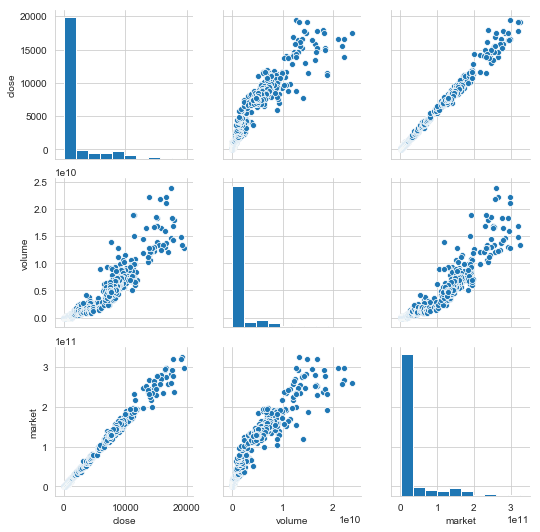

In [12]:
# pairplot of Bitcoin
def plot_pair(df):
    dfBTC=df[df['name']== 'Bitcoin']
    df2=dfBTC.drop(['ranknow','high','low','close_ratio','spread'],axis=1)
    df2['date'] = pd.to_datetime(df2.date)
    df2.set_index('date', inplace=True)
    sns.pairplot(df2[['close','volume','market']])
    plt.savefig("./plots/pairplot_btc.jpg")
    
plot_pair(market_data)

In [13]:
# Let's prepare one dataframe where we will observe closing prices for each currency
wide_format = market_data.groupby(['date', 'name'])['close'].last().unstack()

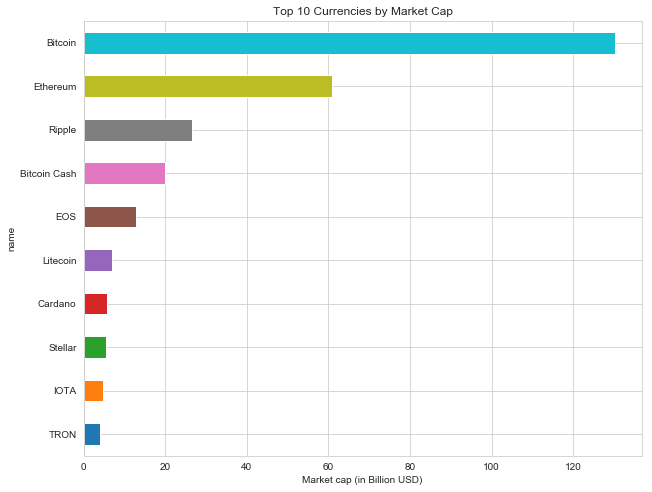

In [14]:
# plot market cap for top 10 cryptocurrencies
def plot_market_cap(data):
    plt.figure(figsize = (10, 8))
    ax = data.groupby(['name'])['market_billion'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh')
    ax.set_xlabel("Market cap (in Billion USD)")
    plt.title("Top 10 Currencies by Market Cap")
    plt.savefig("./plots/market_cap.jpg")
    
plot_market_cap(market_data)

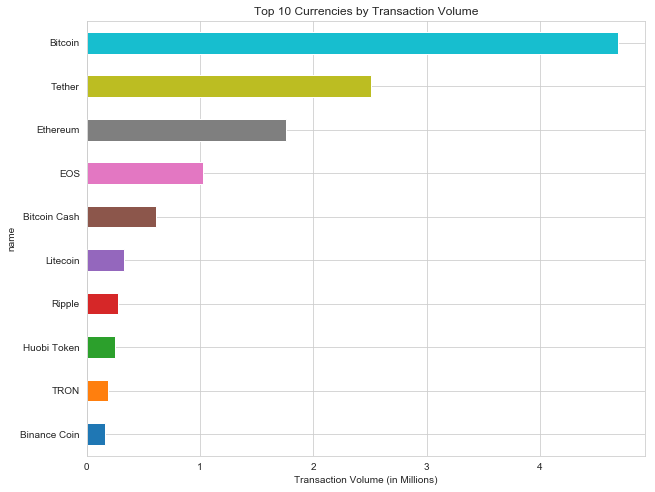

In [15]:
# plot the transaction volumn
def plot_trans_vol(data):
    plt.figure(figsize = (10, 8))
    ax = data.groupby(['name'])['volume_million'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh')
    ax.set_xlabel("Transaction Volume (in Millions)")
    plt.title("Top 10 Currencies by Transaction Volume")
    plt.savefig("./plots/transaction_volumn.jpg")
    
plot_trans_vol(market_data)

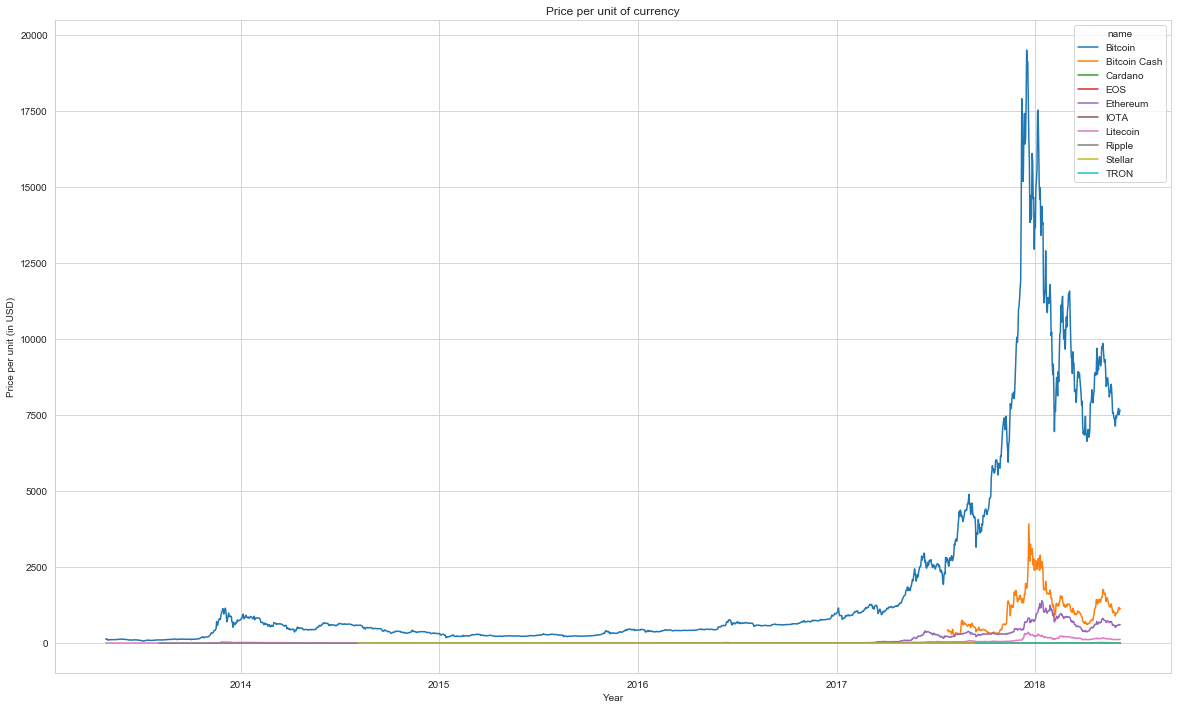

In [27]:
# Look at top 10 currency
def top_10_trend(data):
    top_10_currency_names = data.groupby(['name'])['market'].last().sort_values(ascending=False).head(10).index
    data_top_10_currencies = data[data['name'].isin(top_10_currency_names)]
    plt.rcParams['figure.figsize']=(20, 12)
    ax = data_top_10_currencies.groupby(['date', 'name'])['close'].mean().unstack().plot()
    ax.set_ylabel("Price per unit (in USD)")
    ax.set_xlabel("Year")
    plt.title("Price per unit of currency")
    plt.savefig("./plots/top_10_price_unit.jpg")
    
top_10_trend(market_data)

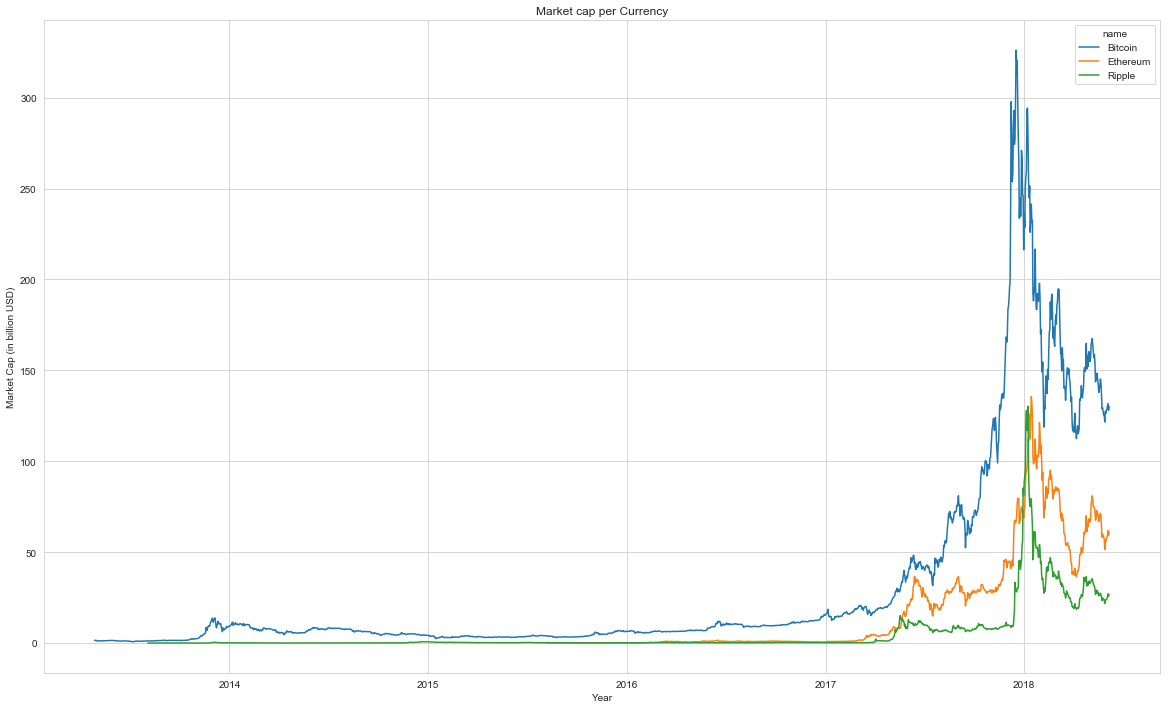

In [28]:
# From obove result we can see compare to the top3, the other cryptocurrencies has not that much impact.
# We will only look at top 3 from now on

def top_3_market_cap(data):
    top_3_currency_names = data.groupby(['name'])['market'].last().sort_values(ascending=False).head(3).index
    data_top_3_currencies = data[data['name'].isin(top_3_currency_names)]
    plt.rcParams['figure.figsize']=(20, 12)
    ax = data_top_3_currencies.groupby(['date', 'name'])['market_billion'].mean().unstack().plot()
    ax.set_xlabel("Year")
    ax.set_ylabel("Market Cap (in billion USD)")
    plt.title("Market cap per Currency")
    plt.savefig("./plots/top_3_market_cap.jpg")
    
top_3_market_cap(market_data)

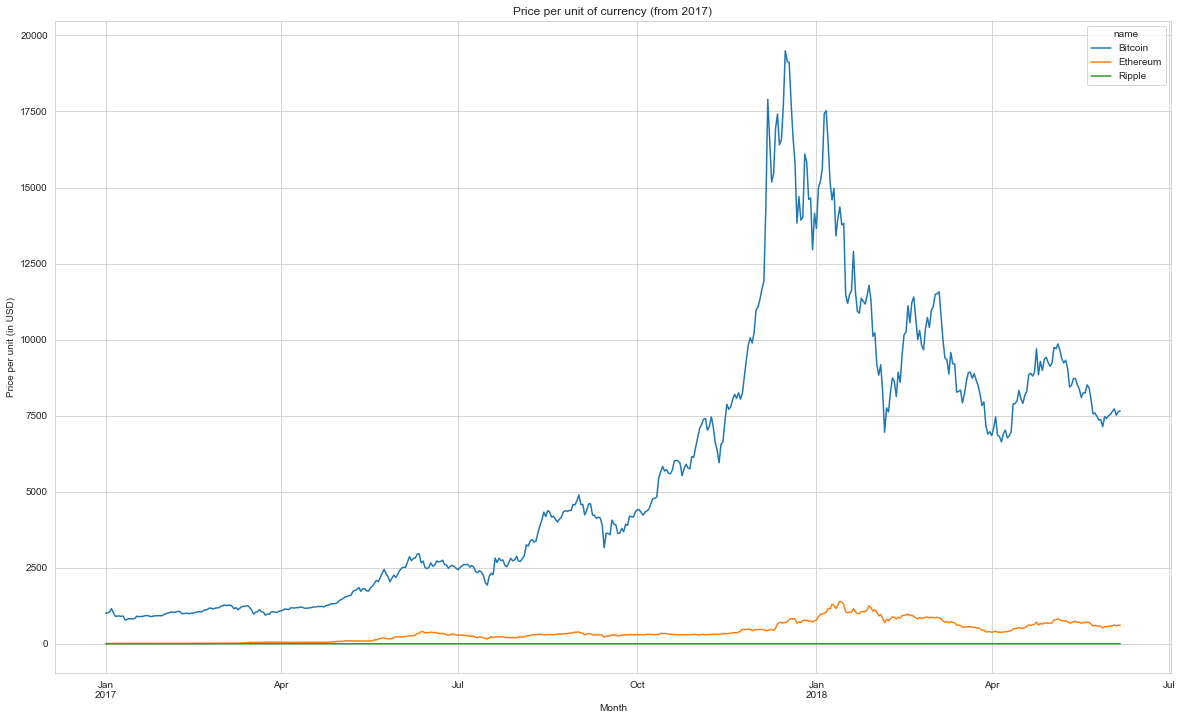

In [29]:
# Like the previous observation, we are interested in the trends after 2017

def plot_trend_recent(data):
    top_3_currency_names = data.groupby(['name'])['market'].last().sort_values(ascending=False).head(3).index
    data_top_3_currencies = data[data['name'].isin(top_3_currency_names)]
    plt.rcParams['figure.figsize']=(20, 12)
    ax = data_top_3_currencies[data_top_3_currencies.date.dt.year >= 2017].groupby(['date', 'name'])['close'].mean().unstack().plot()
    ax.set_xlabel("Month")
    ax.set_ylabel("Price per unit (in USD)")
    plt.title("Price per unit of currency (from 2017)")
    plt.savefig("./plots/top_3_trend_recent.jpg")
    
plot_trend_recent(market_data)

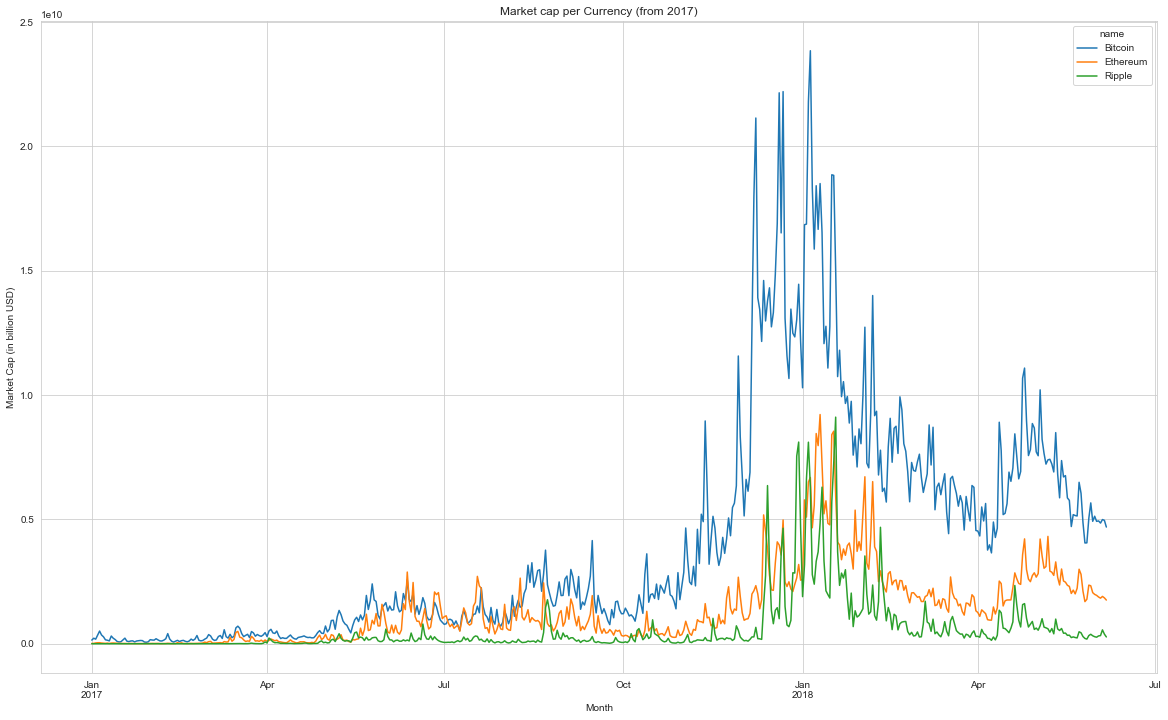

In [30]:
def plot_market_cap_recent(data):
    top_3_currency_names = data.groupby(['name'])['market'].last().sort_values(ascending=False).head(3).index
    data_top_3_currencies = data[data['name'].isin(top_3_currency_names)]
    plt.rcParams['figure.figsize']=(20, 12)
    ax = data_top_3_currencies[data_top_3_currencies.date.dt.year >= 2017].groupby(['date', 'name'])['volume'].mean().unstack().plot()
    ax.set_xlabel("Month")
    ax.set_ylabel("Market Cap (in billion USD)")
    plt.title("Market cap per Currency (from 2017)")
    plt.savefig("./plots/market_cap_recent.jpg")
    
plot_market_cap_recent(market_data)

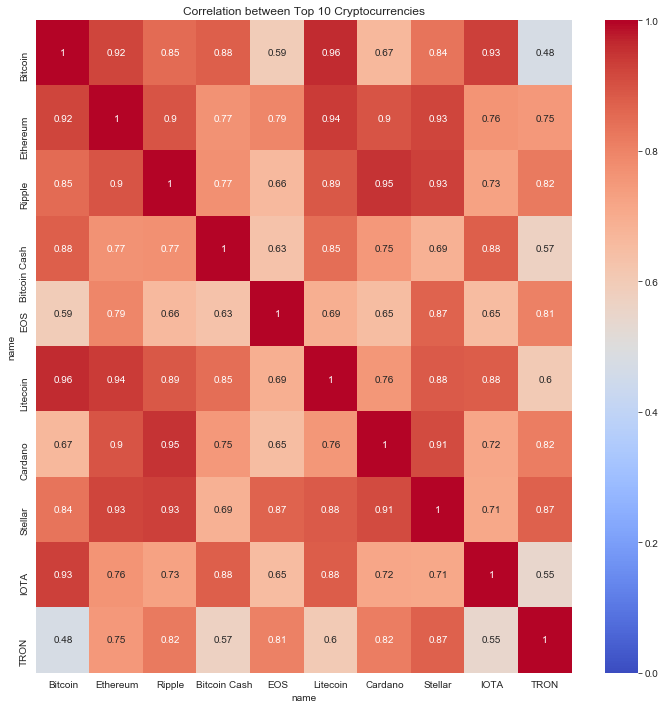

In [20]:
# find the correlation between cryptocurrencies
def plot_corr_top10(data):
    top_10_currency_names = data.groupby(['name'])['market'].last().sort_values(ascending=False).head(10).index
    data_top_10_currencies = data[data['name'].isin(top_10_currency_names)]
    plt.figure(figsize=(12, 12))
    sns.heatmap(wide_format[top_10_currency_names].corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True)
    plt.title("Correlation between Top 10 Cryptocurrencies")
    plt.savefig("./plots/corr_top_10.jpg")
    
plot_corr_top10(market_data)

In [21]:
# find market data for each year
market_2015 = market_data[(market_data['date'] >= dt.date(2015, 1, 1)) & (market_data['date'] <= dt.date(2015, 12, 31))]
market_2016 = market_data[(market_data['date'] >= dt.date(2016, 1, 1)) & (market_data['date'] <= dt.date(2016, 12, 31))]
market_2017 = market_data[(market_data['date'] >= dt.date(2017, 1, 1)) & (market_data['date'] <= dt.date(2017, 12, 31))]
market_2018 = market_data[(market_data['date'] >= dt.date(2018, 1, 1)) & (market_data['date'] <= dt.date(2018, 12, 31))]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavi

In [22]:
# plot pie chart of market share
def plot_pie_chart(data):
    market_val = pd.DataFrame({'market_share' : data.groupby(["name"])['market_billion'].mean().sort_values(ascending=False)}).reset_index()
    market_sum = market_val['market_share'].sum()
    plot_data = market_val.head(10)
    other_share = market_sum - plot_data['market_share'].sum()
    plot_data.loc[10] = ['All Other', other_share]
    #labels = plot_data.sort_values(ascending=False).index
    #values = plot_data.sort_values(ascending=False)
    labels = plot_data['name']
    values = plot_data['market_share']
    trace = go.Pie(labels=labels, values=values)
    return labels, values, trace
    #py.iplot([trace], filename='basic_pie_chart')

In [23]:
def subplot_pie_chart(data1, data2, data3, data4):
    label1, value1, trace1 = plot_pie_chart(data1)
    label2, value2, trace2 = plot_pie_chart(data2)
    label3, value3, trace3 = plot_pie_chart(data3)
    label4, value4, trace4 = plot_pie_chart(data4)
    fig = {
        'data': [
            {
                'labels': label1,
                'values': value1,
                'type': 'pie',
                'name': 'Market Share 2015',
                'domain': {'x': [0, .48],
                           'y': [.51, 1]},
                'hoverinfo':'label+percent+name',
            },
            {
                'labels': label2,
                'values': value2,
                'type': 'pie',
                'name': 'Market Share 2016',
                'domain': {'x': [.52, 1],
                           'y': [.51, 1]},
                'hoverinfo':'label+percent+name',

            },
            {
                'labels': label3,
                'values': value3,
                'type': 'pie',
                'name': 'Market Share 2017',
                'domain': {'x': [0, .48],
                           'y': [0, .49]},
                'hoverinfo':'label+percent+name',
            },
            {
                'labels': label4,
                'values': value4,
                'type': 'pie',
                'name':'Market Share 2018',
                'domain': {'x': [.52, 1],
                           'y': [0, .49]},
                'hoverinfo':'label+percent+name',
            }
        ],
    }

    py.iplot(fig, filename='pie_chart_subplots')

In [24]:
subplot_pie_chart(market_2015, market_2016, market_2017, market_2018)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



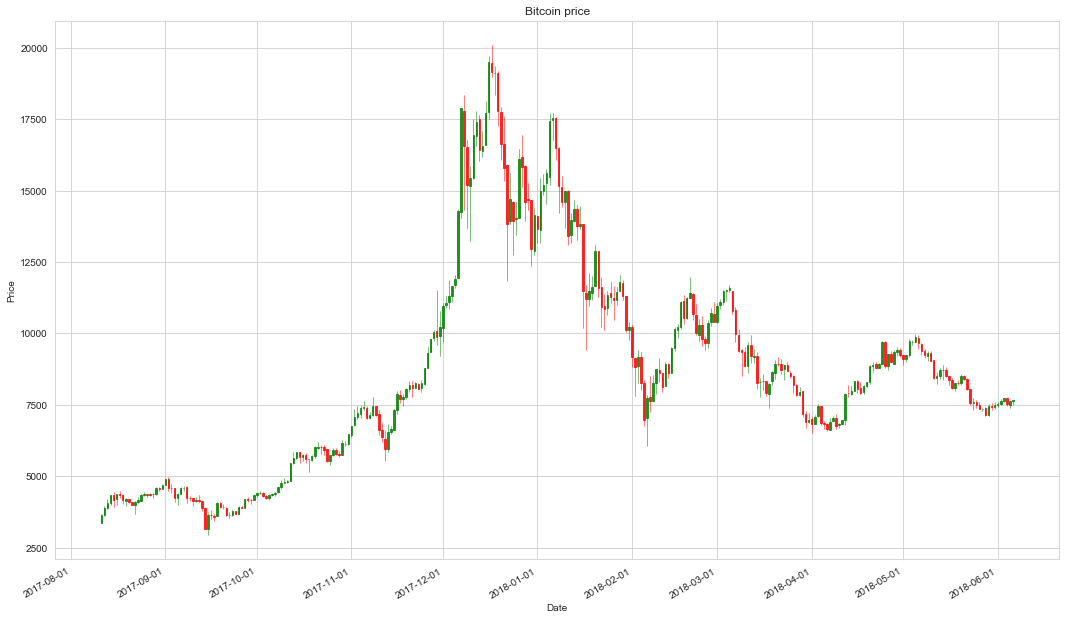

In [25]:
#from datetime import datetime, timedelta
# ref: https://www.kaggle.com/taniaj/cryptocurrency-market-analysis
# Bitcoin price change recent 10 month
def plot_btc_price_change(df):
    # Candlestick chart for Rank 1 currency (limited to 10 Months)
    rank = 1
    months = 10

    name = df[df.ranknow == rank].iloc[-1]['name']
    filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - dt.timedelta(days=30*months)))]
    OHLCfiltered_df = filtered_df[['date','open','high','low','close']]
    OHLCfiltered_df['date'] = mdates.date2num(OHLCfiltered_df['date'].dt.date)

    f,ax=plt.subplots(figsize=(18,11))
    ax.xaxis_date()
    candlestick_ohlc(ax, OHLCfiltered_df.values, width=0.5, colorup='g', colordown='r',alpha=0.75)

    plt.xlabel("Date")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()
    plt.title(name + " price")
    plt.ylabel("Price")
    plt.savefig("./plots/candlestick_btc.jpg")
    plt.show()
    
plot_btc_price_change(market_data)

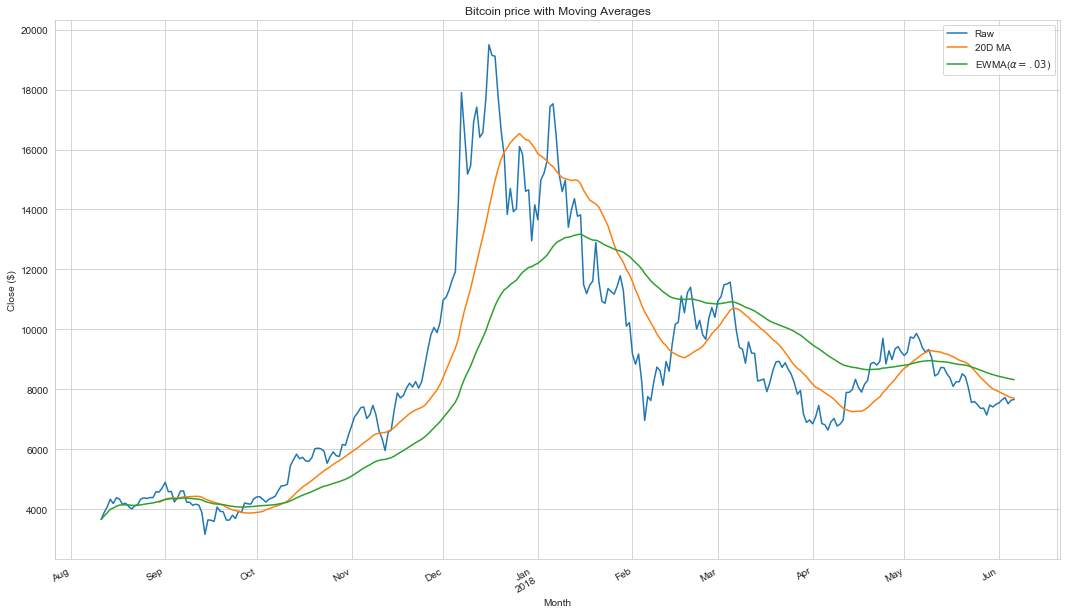

In [26]:
# find out moving averages of Bitcoin
def plot_moving_avg(df):
    # Moving average chart for Rank 1 currency (10 months)
    rank = 1
    months = 10
    name = df[df.ranknow == rank].iloc[-1]['name']
    filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - dt.timedelta(days=30*months)))]

    filtered_df.set_index('date', inplace=True)

    f, ax = plt.subplots(figsize=(18,11))
    filtered_df.close.plot(label='Raw', ax=ax)
    filtered_df.close.rolling(20).mean().plot(label='20D MA', ax=ax)
    filtered_df.close.ewm(alpha=0.03).mean().plot(label='EWMA($\\alpha=.03$)', ax=ax)

    plt.title(name + " price with Moving Averages")
    plt.legend()
    plt.xlabel("Month")
    plt.gcf().autofmt_xdate()
    plt.ylabel("Close ($)")
    plt.savefig("./plots/moving_avg_btc.jpg")
    plt.show()
    
plot_moving_avg(market_data)

In [81]:
# plot pie chart for market share of 2017
plot_pie_chart(market_2015)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [82]:
# plot pie chart for market share of 2016
plot_pie_chart(market_2016)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [83]:
# plot pie chart for market share of 2017
plot_pie_chart(market_2017)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [84]:
# plot pie chart for market share of 2018
plot_pie_chart(market_2018)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

